# Using Spatially Adaptive Sparse Grids

**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Setup](#toc2_)    
- 3. [Link](#toc3_)    
- 4. [Function](#toc4_)    
- 5. [Adaptive Sparse Grid](#toc5_)    
- 6. [Clean up](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

This notebooks shows how [TASMANIAN-7.0](https://tasmanian.ornl.gov/) can be used to work with **spatially adaptive sparse grids**.

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
%load_ext autoreload
%autoreload 2

import os
import shutil
import time
import numpy as np
import numba as nb

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from EconModel import cpptools

## 2. <a id='toc2_'></a>[Setup](#toc0_)

**Install [TASMANIAN 7.0](https://github.com/ORNL/TASMANIAN/) in cppfuncs/:**

In [2]:
cpptools.setup_tasmanian(folder='cppfuncs/',do_print=True)

TASMANIAN successfully installed


**Troubleshooting:** Set `download=False` and compile your own binaries as explained [here](https://github.com/JeppeDruedahl/TASMANIAN).

## 3. <a id='toc3_'></a>[Link](#toc0_)

In [3]:
sasg = cpptools.link_to_cpp('cppfuncs/example_SASG.cpp',do_print=True,options={'compiler':'intel'})

Linking to: cppfuncs/example_SASG.cpp

### finding all included files ###


### writing structs ###

### analyzing cppfuncs/example_SASG.cpp ###

function: create
return type: void*
argument types: ['int', 'int', 'double', 'int', 'double*', 'double*']

function: getNumNeeded
return type: int
argument types: ['void*', 'double', 'bool']

function: getNeededPoints
return type: void
argument types: ['void*', 'double*']

function: loadNeededPoints
return type: void
argument types: ['void*', 'double*']

function: destroy
return type: void
argument types: ['void*']

function: evaluate
return type: void
argument types: ['void*', 'double*', 'double*']

### compiling and linking ###

compile.bat:
cd /d "C:\Program Files (x86)\Intel\oneAPI"
call setvars.bat
cd /d "c:\Users\gmf123.UNICPH\Documents\repositories\EconModelNotebooks"
icx /LD /EHsc /O3 /openmp cppfuncs/example_SASG.cpp cppfuncs/TASMANIAN-7.0/lib/tasmaniansparsegrid.lib  



terminal:

(c:\Users\gmf123.UNICPH\AppData\Local\anaconda3) c:\Users\gmf123.UNICPH\Documents\repositories\EconModelNotebooks>cd /d "C:\Program Files (x86)\Intel\oneAPI" 

(c:\Users\gmf123.UNICPH\AppData\Local\anaconda3) C:\Program Files (x86)\Intel\oneAPI>call setvars.bat 
:: initializing oneAPI environment...
   Initializing Visual Studio command-line environment...
   Visual Studio version 17.0.6 environment configured.
   "C:\Program Files\Microsoft Visual Studio\2022\Community\"
   Visual Studio command-line environment initialized for: 'x64'
:  advisor -- latest
:  compiler -- latest
:  dal -- latest
:  debugger -- latest
:  dev-utilities -- latest
:  dnnl -- latest
:  dpcpp-ct -- latest
:  dpl -- latest
:  intelpython -- latest
:  ipp -- latest
:  ippcp -- latest
:  mkl -- latest
:  mpi -- latest
:  tbb -- latest
:  vpl -- latest
:  vtune -- latest
:: oneAPI environment initialized ::
   Creating library example_SASG.lib and object example_SASG.exp

Intel(R) oneAPI DPC++/C++ Comp

## 4. <a id='toc4_'></a>[Function](#toc0_)

In [4]:
@nb.njit
def f(x1,x2):
    return 1.0/(np.abs((0.5-(1.0-x1/2)**4-(x2/2)**4))+2.0/10)

## 5. <a id='toc5_'></a>[Adaptive Sparse Grid](#toc0_)

**Settings:**

In [5]:
Nx0 = 1
Nx1 = 1
dim_inputs = Nx0+Nx1
dim_outputs = 1
tol = 1e-5
depth_ini = 4
depth_max = 16
lb = np.array([0,0],dtype=np.float_)
ub = np.array([2,2],dtype=np.float_)

**Create:**

In [6]:
# a. containers for points and values
pointss = []
valuess = []

# c. create sasg grid
grid = sasg.create(dim_inputs,dim_outputs,tol,depth_ini,lb,ub)
for depth in range(depth_ini,depth_max):
    
    print(f'depth = {depth}')
    
    # a. do refinement?
    do_refinement = depth > depth_ini
    
    # b. get needed points
    n = sasg.getNumNeeded(grid,tol,do_refinement)    
    points = np.zeros((n,dim_inputs))    
    sasg.getNeededPoints(grid,points.ravel())
    
    # c. load needed points
    values = f(points[:,0],points[:,1])
    sasg.loadNeededPoints(grid,values.ravel())
        
    # e. save
    pointss.append(points) 
    valuess.append(values)
    

depth = 4


depth = 5
depth = 6
depth = 7
depth = 8
depth = 9
depth = 10
depth = 11
depth = 12
depth = 13
depth = 14
depth = 15


**Plot:**

depth = 4


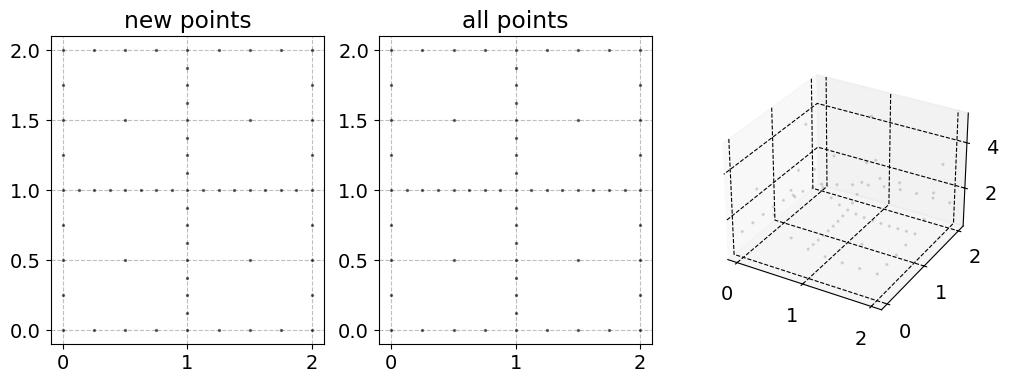

depth = 5


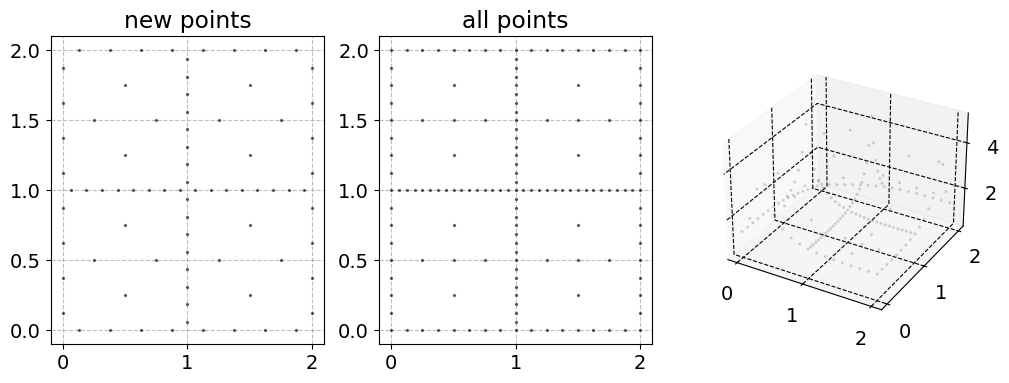

depth = 6


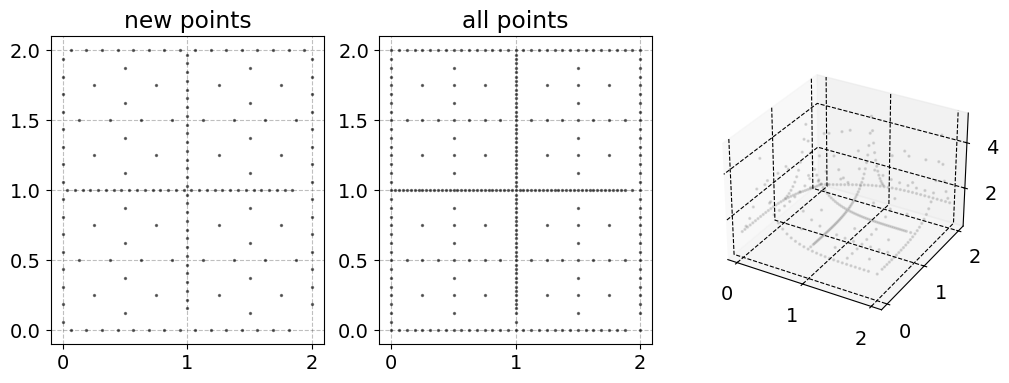

depth = 7


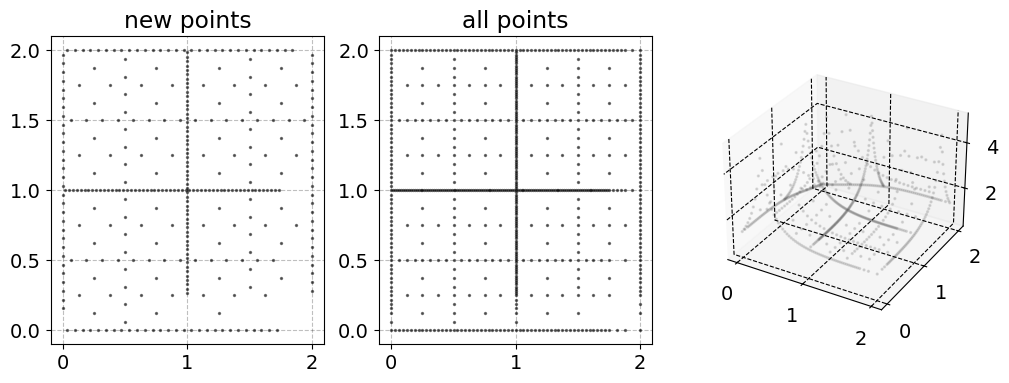

depth = 8


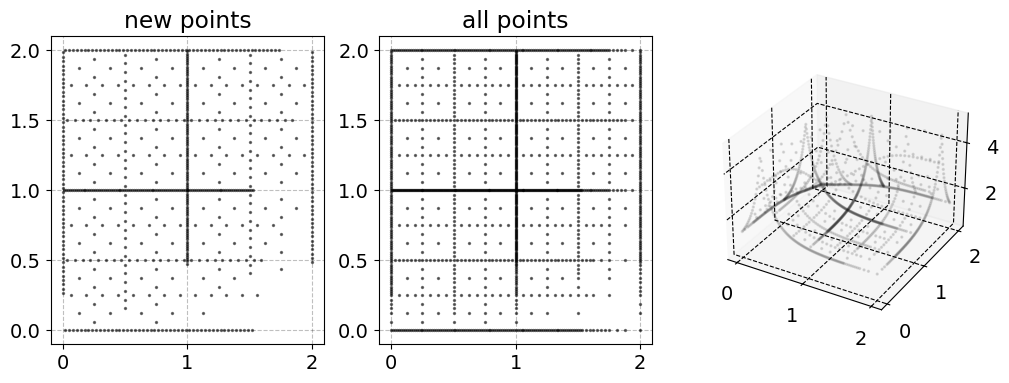

depth = 9


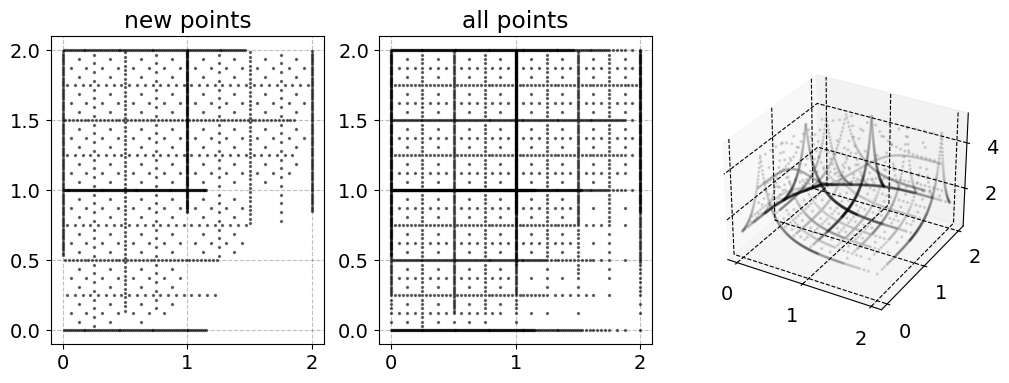

depth = 10


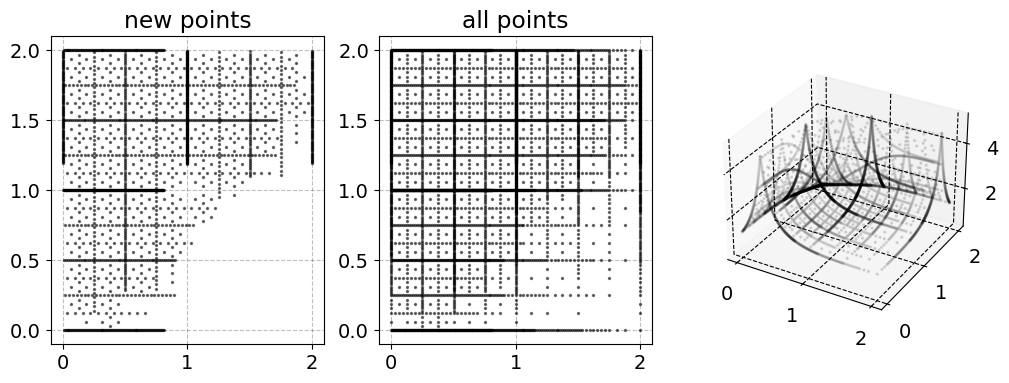

depth = 11


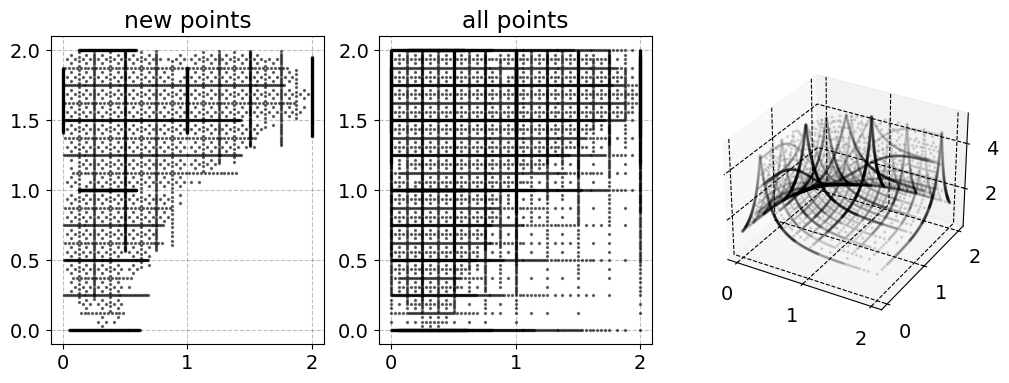

depth = 12


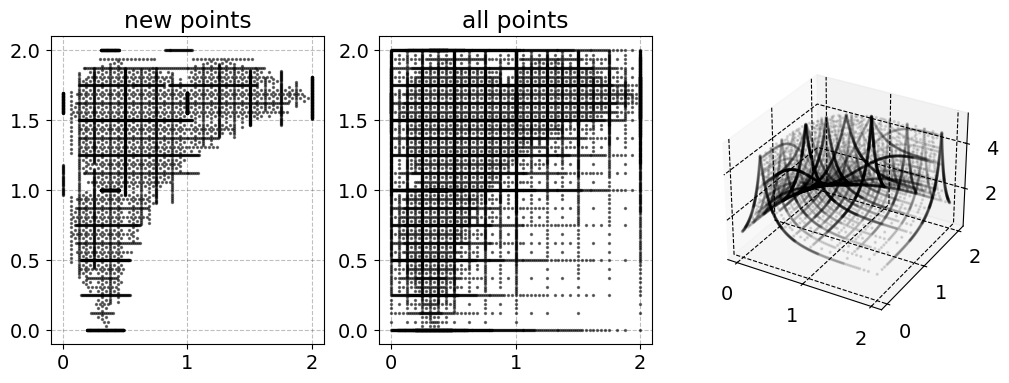

depth = 13


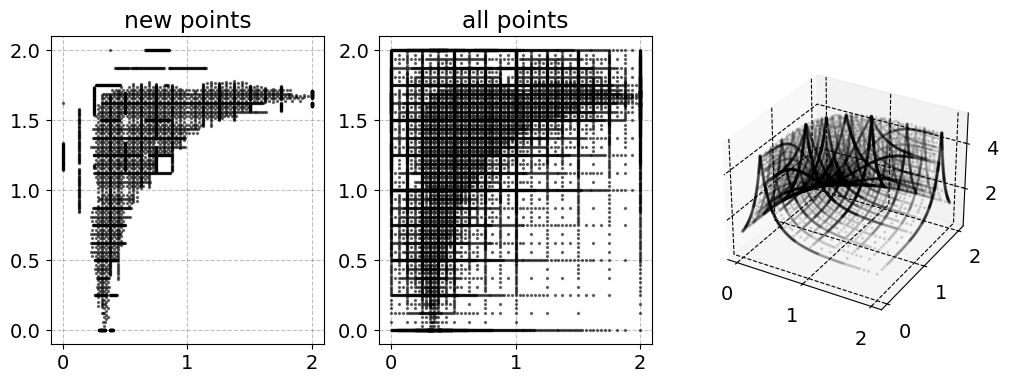

depth = 14


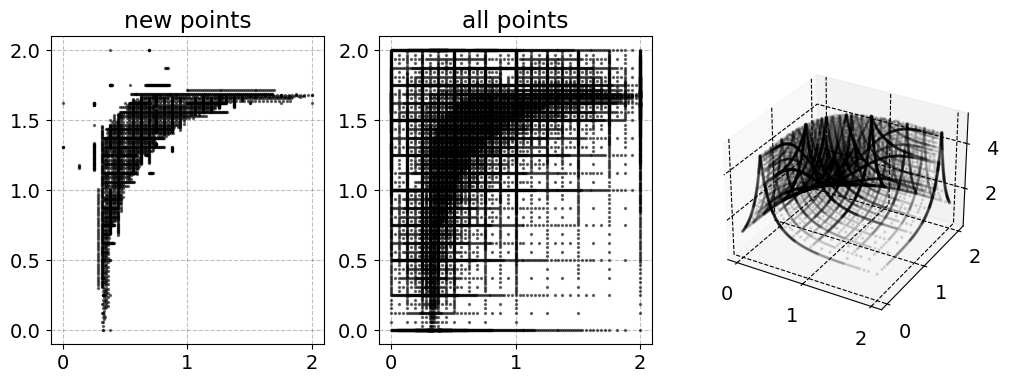

depth = 15


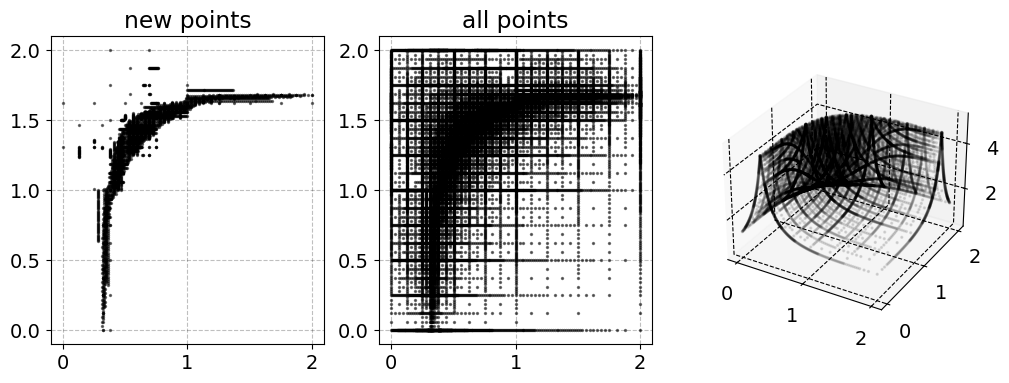

In [7]:
for k,(points,depth) in enumerate(zip(pointss,range(depth_ini,depth_max))):
        
    print(f'depth = {depth}')
    
    fig = plt.figure(frameon=False, figsize=(12,4), dpi=100)
    
    # grids
    ax = fig.add_subplot(1,3,1)
    ax.scatter(points[:,0],points[:,1],s=2,c='black',alpha=0.5)    
    ax.set_title('new points')

    # grids
    ax = fig.add_subplot(1,3,2)
    ax.set_title('all points')
    for points_ in pointss[:k+1]: ax.scatter(points_[:,0],points_[:,1],s=2,c='black',alpha=0.5)    
    
    # function
    ax = fig.add_subplot(1,3,3, projection='3d')    
    for points_,values_ in zip(pointss[:k+1],valuess[:k+1]): ax.scatter(points_[:,0],points_[:,1],values_.ravel(),s=2,c='black',alpha=0.1)
    plt.show()


**Destroy:**

In [8]:
sasg.destroy(grid)

## 6. <a id='toc6_'></a>[Clean up](#toc0_)

**Clean up:**

In [9]:
sasg.clean_up()

**Remove:**

In [10]:
os.remove('cppfuncs/TASMANIAN-7.0.zip')
shutil.rmtree('cppfuncs/TASMANIAN-7.0/')